In [198]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style='darkgrid', palette='viridis', context='talk')

In [199]:
import datetime

In [200]:
datetime.date.today()

datetime.date(2022, 4, 11)

# Import

In [201]:
out/fbagd/100/2022-04-11 13:42:58.572506

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (335750053.py, line 1)

In [276]:
time = 100
# entry = '2022-04-11 09:34:01.360686' # original
# entry = '2022-04-11 10:12:59.182986' # uptake
# entry = '2022-04-11 10:28:09.721113' # carbon
# entry = '2022-04-11 10:59:58.572182' # futile cycle disabled
# entry = '2022-04-11 11:50:43.842592' # futile cycle enabled
entry = '2022-04-11 13:42:58.572506' # carbon restriction
folder = f'../out/fbagd/{time}/{entry}/'

In [277]:
output = np.load(folder + 'output.npy',allow_pickle='TRUE').item()
output = output['agents']['0']
fba = output['listeners']['fba_results']
mass = output['listeners']['mass']

In [278]:
# mass = np.load(folder + 'mass.npy',allow_pickle='TRUE').item()
# bulk = np.load(folder + 'bulk.npy',allow_pickle='TRUE').item()
# fba = np.load(folder + 'fba_results.npy',allow_pickle='TRUE').item()
stoichiometry = np.load(folder + 'stoichiometry.npy',allow_pickle='TRUE')

In [279]:
fba.keys()

dict_keys(['estimated_fluxes', 'estimated_homeostatic_dmdt', 'target_homeostatic_dmdt', 'target_kinetic_fluxes', 'estimated_exchange_dmdt', 'estimated_all_dmdt', 'maintenance_target', 'solution_fluxes', 'solution_dmdt', 'solution_residuals', 'time_per_step'])

In [280]:
times = [time - fba['time_per_step'][1] for time in fba['time_per_step'][1:]]
time_diff = [(times[i+1] - times[i])/2 for i in range(len(times)-1)]
index = [i for i in range(len(times)-1)]

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Real second to simulation second')

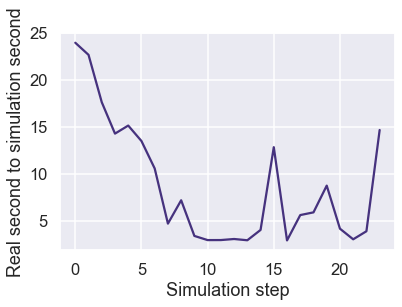

In [281]:
f = sns.lineplot(index, time_diff)
f.set_xlabel('Simulation step')
f.set_ylabel('Real second to simulation second')

In [282]:
fba['estimated_exchange_dmdt'].keys()

dict_keys(['CPD-564[c]', 'Pi[p]', 'K+[p]', 'CO+2[p]', 'AMMONIUM[c]', 'CL-[p]', 'OXYGEN-MOLECULE[p]', 'SULFATE[p]', 'CPD-560[p]', 'D-ALANINE[p]', 'SUC[p]', 'ZN+2[p]', 'FE+2[p]', 'METOH[p]', 'FORMATE[p]', 'URACIL[p]', 'CH33ADO[c]', 'GLC[p]', 'CPD0-2167[c]', 'UNDECAPRENYL-DIPHOSPHATE[p]', 'CPD-534[p]', 'MN+2[p]', 'CARBON-DIOXIDE[p]', 'UREA[p]', 'WATER[p]', 'NA+[p]', 'CPD-239[p]', 'THYMINE[p]', 'BUTANAL[c]', 'CA+2[p]', 'NI+2[p]', 'MG+2[p]', 'HYPOXANTHINE[p]', 'CPD-108[p]', 'CPD-10774[p]', 'ACET[p]', 'S-ADENOSYL-4-METHYLTHIO-2-OXOBUTANOATE[c]', 'PROTON[p]', 'MI-PENTAKISPHOSPHATE[p]', 'ETOH[p]', 'D-LACTATE[p]', 'L-SELENOCYSTEINE[c]', 'GLYCOLLATE[c]', 'XANTHINE[p]', 'BETAINE[p]', 'GLYCOLALDEHYDE[c]', 'INDOLE[p]', 'HYDROGEN-MOLECULE[c]', 'CPD-1772[c]', 'GLYCEROL[p]', 'CARBON-MONOXIDE[p]'])

In [283]:
sorted_exchange = pd.DataFrame(fba['estimated_exchange_dmdt']).sort_values(by=24, axis=1)
sorted_exchange.head()

,WATER[p],GLC[p],AMMONIUM[c],K+[p],SULFATE[p],MG+2[p],CL-[p],CARBON-MONOXIDE[p],CPD-1772[c],GLYCEROL[p],...,D-LACTATE[p],CPD0-2167[c],UNDECAPRENYL-DIPHOSPHATE[p],CPD-560[p],D-ALANINE[p],SUC[p],CARBON-DIOXIDE[p],ACET[p],HYDROGEN-MOLECULE[c],PROTON[p]
0,-795246,-970843,25344,6,26,0,-36,-28,-62,5948,...,42,-16,3,-2,117,510611,497573,1296033,1513997,2747042
1,-1305007,-2315439,-483699,54,98,21,-39,-31,-44,659003,...,-140,0,77,153,-227,523302,1800110,2810100,4094953,5083427
2,-3461030,-2307128,-694030,-5520,1,-263,-171,-30,-7,214725,...,-17,-10,78,-41,-3,602777,2050705,2950403,5050458,5386063
3,-5288338,-2307327,-722890,-10237,-2482,-456,-291,-29,-4,88487,...,81,14,165,197,85,711147,2037897,2915528,5140738,5436035
4,-6763848,-2308101,-711920,-14056,-4156,-625,-381,-23,4741,-209,...,11,-4,214,344,-378,789115,2060846,2873956,5169611,5361754


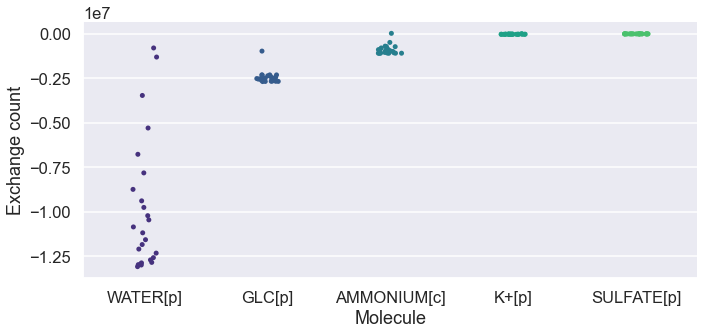

In [284]:
sns.catplot(y="Exchange count", x="Molecule", data=sorted_exchange.iloc[:,0:5].melt(var_name="Molecule", value_name="Exchange count"), aspect=2)

In [285]:
sns.catplot(sorted_exchange.iloc[:, 0:5])

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [286]:
# fba['solution_residuals']['futile_cycle']

# Mass

<AxesSubplot:>

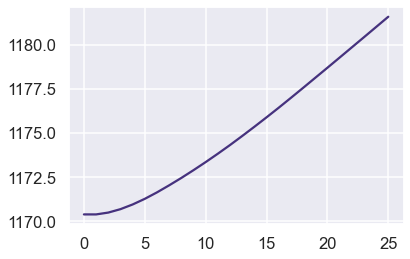

In [287]:
sns.lineplot(x=[i for i in range(len(mass['cell_mass']))],y=mass['cell_mass'])

# Meeting homeostatic objective

In [169]:
df1 = pd.DataFrame(fba['estimated_homeostatic_dmdt'])
df1.head()
# df1

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,10,-8,-1,-2,0,1,-2,3,1,2,...,-2,1,0,3,0,1,-13,-14,1,6
1,100,-51,2,-29,-13,-31,342,-11,21,-149,...,55,2,0,15,0,0,4,-53,14,49
2,-75,67,-30,31,3,21,9,62,7,69,...,3738,-2,4,5,1,-3,9,-98,-43,-46
3,1,40,-31,16,52,3,17,121,70,46,...,6918,3,8,-33,3,-2,11,194,-65,-56
4,11,57,1,24,48,23,-2,147,143,31,...,9591,6,11,-1,6,0,13,21,-71,-2


In [170]:
df1 = df1.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='update')


In [171]:
pd.DataFrame(fba['target_homeostatic_dmdt']).head()

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,1,1,1,...,-1,0,0,0,0,0,0,0,0,0
1,-10,8,1,2,0,-1,363,-2,0,-1,...,-1,-1,0,-3,0,-1,13,46,21,0
2,-102,80,5,39,31,33,23,70,41,149,...,3751,3,6,-12,6,5,15,104,13,-43
3,-13,50,44,22,60,18,17,119,146,81,...,6926,16,13,-6,16,19,17,214,66,14
4,7,61,88,27,52,22,3,151,231,35,...,9593,27,19,41,27,35,20,34,146,84


In [172]:
df2 = pd.DataFrame(fba['target_homeostatic_dmdt'])
df2 = df2.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='target')
df2

,index,timestep,target
0,2-3-DIHYDROXYBENZOATE[c],0,0
1,2-KETOGLUTARATE[c],0,0
2,2-PG[c],0,0
3,2K-4CH3-PENTANOATE[c],0,0
4,4-AMINO-BUTYRATE[c],0,0
...,...,...,...
4270,MN+2[p],24,167
4271,NA+[p],24,48
4272,OXYGEN-MOLECULE[p],24,91
4273,CA+2[p],24,850


In [173]:
df3 = df1.merge(df2, left_on=['index', 'timestep'], right_on=['index', 'timestep'])
# df3[df3['timestep'] == 900].T
df3

df3['update'] = df3['update'].abs() 
df3['target'] = df3['target'].abs() 

df3['update'] = np.log10(df3['update'])
df3['target'] = np.log10(df3['target'])
df3['diff'] = df3['target'] - df3['update']

df3

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,timestep,update,target,diff
0,2-3-DIHYDROXYBENZOATE[c],0,1.000000,-inf,-inf
1,2-KETOGLUTARATE[c],0,0.903090,-inf,-inf
2,2-PG[c],0,0.000000,-inf,-inf
3,2K-4CH3-PENTANOATE[c],0,0.301030,-inf,-inf
4,4-AMINO-BUTYRATE[c],0,-inf,-inf,NaN
...,...,...,...,...,...
4270,MN+2[p],24,1.491362,2.222716,0.731355
4271,NA+[p],24,1.462398,1.681241,0.218843
4272,OXYGEN-MOLECULE[p],24,-inf,1.959041,inf
4273,CA+2[p],24,1.380211,2.929419,1.549208


In [230]:
df3_subset = df3[df3['timestep'].isin([0, 1, 2, 10, 24])]

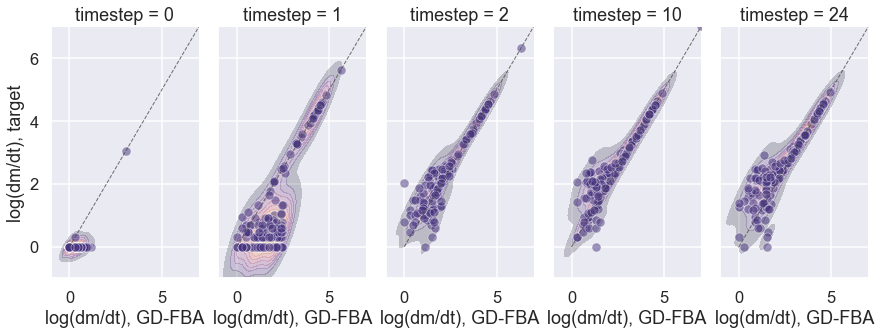

In [234]:
g = sns.FacetGrid(df3_subset, col="timestep", col_wrap=5, aspect=0.5, height=5, xlim=(-1,7), ylim=(-1,7))
g.map(sns.kdeplot, "update", "target", cmap="inferno", alpha=0.2, fill=True)
g.map(sns.scatterplot, "update", "target", alpha=0.5)
g.set_axis_labels("log(dm/dt), GD-FBA","log(dm/dt), target")

for ax in g.axes:
    ax.plot([0, 9], [0, 9], linewidth=1,  linestyle='--', color='.3', alpha=0.8)
    

plt.margins(0,0)

## Outliers?

In [176]:
df4 = df3.loc[df3['timestep'] == 25].reset_index(drop=True)
outliers = list(df4.loc[df4['diff']>0.5, 'index'])

<AxesSubplot:>

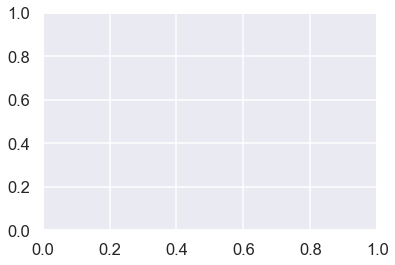

In [177]:
sns.histplot(x='diff', data=df4)

In [178]:
outliers

[]

In [179]:
bulk.loc[:, outliers]

NameError: name 'bulk' is not defined

Doesn't look like they're going into negative at least. Are they being used?

## Usage

In [180]:
df5 = df3.loc[df3['timestep'] > 25].reset_index(drop=True)
outlier_time = df5[df5['index'].isin(outliers)]

<AxesSubplot:>

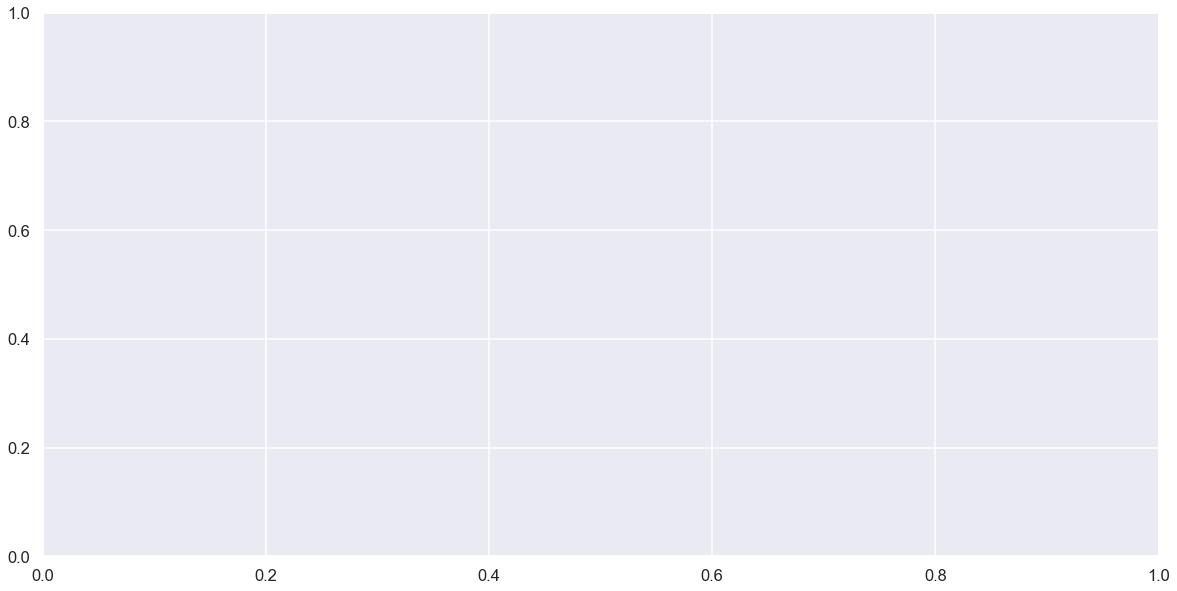

In [181]:
plt.figure(figsize=[20,10])
sns.lineplot(x='timestep', y='diff', hue='index', data=outlier_time, legend=False)

I would guess that they're just not incentivized enough to reach their target completely. 

# Glucose transport

In [182]:
stoichiometry[1]

{'reaction id': '1.1.1.127-RXN',
 'stoichiometry': {'2-DEHYDRO-3-DEOXY-D-GLUCONATE[c]': -1,
  'NAD[c]': -1,
  'CPD-343[c]': 1,
  'NADH[c]': 1,
  'PROTON[c]': 1},
 'is reversible': True,
 'enzyme': ['KDUD-MONOMER[c]']}

In [183]:
estimated_fluxes = pd.DataFrame(fba['estimated_fluxes'])
estimated_fluxes

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,-6,-5,12,-1,-6,-1,-3,0,2,...,-77,-3246,-337401,340722,7,0,10,-2,-2,1971173
1,-7,-34,13,-5,55,-1,-1,-59,-7,-3,...,-182,-46321,-251148,297648,25,0,22,-2,55,7128366
2,3,-10,-93,-27,48,-94,-47,-6,-3,7,...,-17,-51352,-241282,292647,-217,-2,101,-2,3738,7679637
3,27,1,0,78,-11,-1,-4,-40,-2,1,...,-30,-64197,-215634,279860,-1,0,4,-2,6918,7652297
4,36,3,-1,88,16,0,-5,-2,0,1,...,-6,-72041,-200042,272087,8,-1,0,0,9591,7633134
5,46,0,0,103,17,-1,-8,-2,1,3,...,-7,-78800,-186618,265422,9,-2,3,-1,11566,7569371
6,47,-2,1,105,17,-1,-7,-3,1,3,...,-7,-83885,-176551,260445,15,2,4,-1,13230,7553665
7,54,-1,-1,129,51,0,-12,-23,2,0,...,-5,-90736,-162976,253716,1,0,-1,0,14433,7551517
8,47,1,-7,120,12,0,-7,-1,0,3,...,-391,-94384,-155411,250187,-1,2,1,-7,15081,7576287
9,50,7,-3,110,23,-1,-39,-61,-2,6,...,93,-96788,-151078,247743,15,-28,-1,0,15673,7605275


In [212]:
fluxes = pd.DataFrame(fba['estimated_fluxes'])
cycle = fluxes.loc[:,['RXN0-7209-GLC//GLC.9.','RXN0-7247-GLC//GLC.9.']]
cycle.head()

cycle.columns = ['A->B', 'B->A']

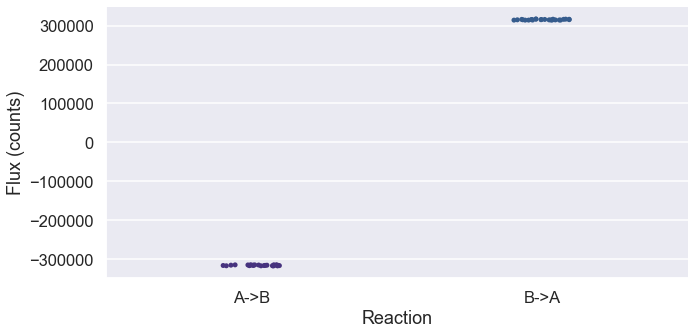

In [213]:
sns.catplot(y="Flux (counts)", x="Reaction", data=cycle.melt(var_name="Reaction", value_name="Flux (counts)"), aspect=2)

In [274]:
for reaction in stoichiometry:
    if 'GLC[p]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')
        
# for reaction in stoichiometry:
#     if 'GLC[p]' in reaction['stoichiometry'].keys():
#         print(reaction['reaction id'], reaction['stoichiometry'],sep='\n')

3.2.1.21-RXN-Beta-D-glucosides/WATER//Non-Glucosylated-Glucose-Acceptors/GLC.64.
{'Beta-D-glucosides[p]': -1, 'WATER[p]': -1, 'Non-Glucosylated-Glucose-Acceptors[p]': 1, 'GLC[p]': 1}
[0, 8, -2, 0, 4, -1, 60, 15, 0, -38, -1, -1, -28, -12, 0, 14, -12, 0, -5, -6, 0, 0, 0, 0, -1, 1, -11, -4, 0, 0, -423, -11, -1, 0, 212, 0, 0, -42, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 0, 0]
GLUCOSE-1-PHOSPHAT-RXN[CCO-PERI-BAC]-GLC-1-P/WATER//GLC/Pi.36.
{'GLC-1-P[p]': -1, 'WATER[p]': -1, 'GLC[p]': 1, 'Pi[p]': 1}
[-4, -11, 34, 0, 83, -23, 0, 0, 0, -37, -1, -1, -22, -169, -26, -1, -10, 0, -5, -7, -77, 0, 54, -1, -1, 1, -13, -7, 0, -7, -298, -21, -1, 64, 0, -3, 77, 119, 71, 136, 130, 102, 122, 106, 0, 0, 0, 0, -14, 0]
GLUCOSE-1-PHOSPHAT-RXN[CCO-PERI-BAC]-GLC-1-P/WATER//GLC/Pi.36.__GLUCOSE-1-PHOSPHAT-CPLX
{'GLC-1-P[p]': -1, 'WATER[p]': -1, 'GLC[p]': 1, 'Pi[p]': 1}
[-4, -11, 34, 0, 83, -23, 0, 0, 0, -37, -1, -1, -22, -169, -26, -1, -10, 0, -5, -7, -77, 0, 54, -1, -1, 1, -13, -7, 0, -7, -298, -21, -1, 64, 0, -3, 77, 119

We should look at the following:

In [187]:
glucose_transport_reactions = ['TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.',
                               'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.',
                               'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.',
                               'RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.',
                               'RXN0-7077-GLC/PROTON//Glucopyranose/PROTON.33.',
                               'RXN0-7077-GLC/PROTON//GLC/PROTON.23.',
                               'TRANS-RXN0-574-GLC//GLC.9.',
                               'TRANS-RXN0-574-GLC//Glucopyranose.19.']

In [188]:
for reaction in stoichiometry:
    if reaction['reaction id'] in glucose_transport_reactions:
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.
{'GLC[p]': -1, 'PROTON[p]': -1, 'ALPHA-GLUCOSE[c]': 1, 'PROTON[c]': 1}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
RXN0-7077-GLC/PROTON//GLC/PROTON.23.
{'GLC[p]': -1, 'PROTON[p]': -1, 'GLC[c]': 1, 'PROTON[c]': 1}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
RXN0-7077-GLC/PROTON//Glucopyranose/PROTON.33.
{'GLC[p]': -1, 'PROTON[p]': -1, 'Glucopyranose[c]': 1, 'PROTON[c]': 1}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.
{'PTSH-PHOSPHORYLATED[c]': -1, 'GLC[p]': -1, 'ALPHA-GLC-6-P[c]': 1, 'PTSH-MONOMER[c]': 1}
[73612, 576778, 629169, 655261, 667480, 686115, 700117, 706818, 708092, 712954, 717654, 725086, 731490, 733725, 736705, 737987, 739210, 741405, 744435, 747976, 749764, 746808, 748833, 752019, 753434]
TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOME

# How much glucose is being used?

In [248]:
fluxes = pd.DataFrame(fba['estimated_fluxes'])
influx = fluxes.loc[:,glucose_transport_reactions]
influx.head()

influx.columns = ['PTS-1', 'PTS-2', 'PTS-3', 'DIF-1', 'DIF-2', 'DIF-3', 'DIF-4', 'DIF-5']

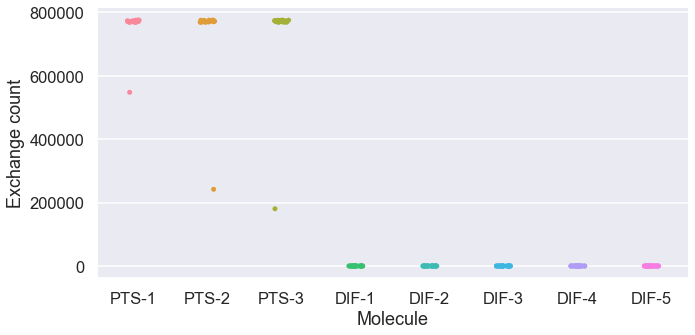

In [249]:
sns.catplot(y="Exchange count", x="Molecule", data=influx.melt(var_name="Molecule", value_name="Exchange count"), aspect=2)

In [70]:
influx.sum(axis=1)

0     1092338
1     2339429
2     2652466
3     2782083
4     2858940
5     2926235
6     2981877
7     3028137
8     3046522
9     3068806
10    3092891
11    3117097
12    3143672
13    3161650
14    3177648
15    3189305
16    3201969
17    3212898
18    3218958
19    3235973
20    3246146
21    3246161
22    3249948
23    3257902
24    3264415
25    3277392
26    3278330
27    3277630
28    3286155
29    3292994
30    3298032
31    3299230
32    3306346
33    3310363
34    3312714
35    3314552
36    3313298
37    3314960
38    3317712
39    3319272
40    3319640
41    3315564
42    3316570
43    3316867
44    3317284
45    3320110
46    3322247
47    3327446
48    3328486
49    3330023
dtype: int64

In [207]:
exchanges = pd.DataFrame(fba['estimated_exchange_dmdt'])
exchanges['GLC[p]']

0    -978020
1   -1898310
2   -2052632
3   -2082478
4   -2115320
Name: GLC[p], dtype: int64

Looks like that's all of it.

## What's the flux coming from Glc[p]?

In [188]:
sol_fluxes = pd.DataFrame(fba['solution_fluxes'])
sol_fluxes.loc[:,glucose_transport_reactions]

,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.,RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.,TRANS-RXN0-574-GLC//GLC.9.,TRANS-RXN0-574-GLC//Glucopyranose.19.
0,0.127023,0.166654,0.137787,0.096819,-1.187428e-12,1.700002e-12
1,0.443980,0.492491,0.452757,0.030854,8.878109e-08,8.213257e-08
2,0.490055,0.545359,0.502474,0.017886,-4.801261e-09,-3.815861e-09
3,0.511017,0.550001,0.524830,0.012895,1.289670e-08,1.253219e-08
4,0.530710,0.550040,0.546246,0.006830,6.217321e-08,7.245056e-08


In [37]:
pd.DataFrame(fba['estimated_fluxes']).head()

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,0,-3,0,0,-12,-13,-7,-2,2,...,-66,-48016,52877,-4805,0,-10,12,9,-1,1971173
1,37,0,-6,70,0,-9,0,0,0,1,...,0,-48055,52811,-4755,0,0,17,0,46,7128364
2,24,-1,-1,74,15,-1,-12,-2,0,1,...,0,-48059,52815,-4756,2,0,2,0,3876,7679656
3,40,0,0,85,-1,0,-2,-1,0,1,...,0,-48068,52824,-4757,1,-1,0,0,6986,7652314
4,46,0,0,90,14,-1,0,0,0,1,...,0,-48078,52836,-4758,0,0,1,0,9603,7633146


# Hmm

In [236]:
for reaction in stoichiometry:
    if 'CPD-564[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

ADENOSYLHOMOCYSTEINE-NUCLEOSIDASE-RXN
{'ADENOSYL-HOMO-CYS[c]': -1, 'WATER[c]': -1, 'CPD-564[c]': 1, 'ADENINE[c]': 1}
[0, -44, -34, -45, 2]
RIBOSYLHOMOCYSTEINASE-RXN
{'CPD-564[c]': -1, 'HOMO-CYS[c]': 1, 'DIHYDROXYPENTANEDIONE[c]': 1}
[547866, 532346, 540767, 550069, 554167]
TRANS-RXN0-265-CPD-564//CPD-564.17.
{'CPD-564[c]': -1, 'CPD-564[p]': 1}
[0, 0, 0, 0, 0]


In [237]:
for reaction in stoichiometry:
    if 'DIHYDROXYPENTANEDIONE[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RIBOSYLHOMOCYSTEINASE-RXN
{'CPD-564[c]': -1, 'HOMO-CYS[c]': 1, 'DIHYDROXYPENTANEDIONE[c]': 1}
[547866, 532346, 540767, 550069, 554167]
RXN-10015
{'DIHYDROXYPENTANEDIONE[c]': -1, 'CPD-10773[c]': 1}
[107790, -29, -6, -6, 0]
RXN-10016
{'DIHYDROXYPENTANEDIONE[c]': -1, 'CPD-10775[c]': 1}
[0, -6, -6, -5, 0]
RXN0-5461
{'DIHYDROXYPENTANEDIONE[c]': -1, 'ATP[c]': -1, 'CPD-10551[c]': 1, 'ADP[c]': 1, 'PROTON[c]': 1}
[440076, 532391, 540773, 550072, 554167]


In [238]:
for reaction in stoichiometry:
    if 'CPD-10551[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RXN-15216
{'CPD-10551[c]': -1, 'CPD0-2467[c]': 1}
[440076, 532461, 540837, 550159, 554259]
RXN0-5461
{'DIHYDROXYPENTANEDIONE[c]': -1, 'ATP[c]': -1, 'CPD-10551[c]': 1, 'ADP[c]': 1, 'PROTON[c]': 1}
[440076, 532391, 540773, 550072, 554167]


In [239]:
for reaction in stoichiometry:
    if 'CPD0-2467[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RXN-15216
{'CPD-10551[c]': -1, 'CPD0-2467[c]': 1}
[440076, 532461, 540837, 550159, 554259]
RXN-15943 (reverse)
{'DIHYDROXY-ACETONE-PHOSPHATE[c]': 1, 'ACETYL-COA[c]': 1, 'CPD0-2467[c]': -1, 'CO-A[c]': -1}
[440076, 532595, 541011, 550384, 554442]
RXN0-6720
{'CPD0-2467[c]': -1, 'WATER[c]': -1, 'CPD0-2468[c]': 1}
[0, -68, -109, -139, -92]


## Get top fluxes

In [38]:
top_fluxes = list(fluxes.sort_values(axis=1, by=49, ascending=False).columns[0:50])
top_fluxes

KeyError: 49

In [39]:
df3[df3['index'].isin(top_fluxes)]

NameError: name 'top_fluxes' is not defined

# Check target goal

In [40]:
fba['estimated_fluxes']['maintenance_reaction']

[1971173, 7128364, 7679656, 7652314, 7633146]